In [37]:
#importing relevant libraries/packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, linregress
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# LOADING AND PREPROCESSING THE DATA 
df = pd.read_csv("Assignment2(exam_assignment)/ObesityDataSet.csv")

df.rename(columns={
    'FAVC': 'FrequentHighCalorieFood',
    'FCVC': 'VegetableConsumptionFrequency',
    'NCP': 'NumberOfMainMeals',
    'CAEC': 'ConsumptionBetweenMeals',
    'NObeyesdad': 'ObesityLevelDeducted',
    'MTRANS': 'TransportationUsed',
    'CALC': 'AlcoholConsumption',
    'TUE': 'TechnologyUsageTime',
    'FAF': 'PhysicalActivityFrequency',
    'SCC': 'CaloriesConsumptionMonitoring',
    'CH2O': 'DailyWaterConsumption',
    'SMOKE': 'SmokerStatus'
}, inplace=True)

In [13]:
# Checking for NaN values.
print("Total missing values:\n", df.isna().sum().sum(), "\n\n")
print("Missing values in the different features:\n", df.isna().sum())


Total missing values:
 0 


Missing values in the different features:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FrequentHighCalorieFood           0
VegetableConsumptionFrequency     0
NumberOfMainMeals                 0
ConsumptionBetweenMeals           0
SmokerStatus                      0
DailyWaterConsumption             0
CaloriesConsumptionMonitoring     0
PhysicalActivityFrequency         0
TechnologyUsageTime               0
AlcoholConsumption                0
TransportationUsed                0
ObesityLevelDeducted              0
dtype: int64


In [15]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FrequentHighCalorieFood         2111 non-null   object 
 6   VegetableConsumptionFrequency   2111 non-null   float64
 7   NumberOfMainMeals               2111 non-null   float64
 8   ConsumptionBetweenMeals         2111 non-null   object 
 9   SmokerStatus                    2111 non-null   object 
 10  DailyWaterConsumption           2111 non-null   float64
 11  CaloriesConsumptionMonitoring   2111 non-null   object 
 12  PhysicalActivityFrequency       21

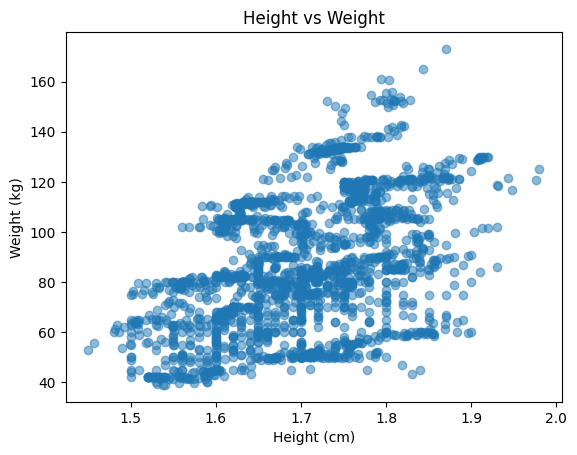

In [18]:
plt.scatter(df['Height'], df['Weight'], alpha=0.5)
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

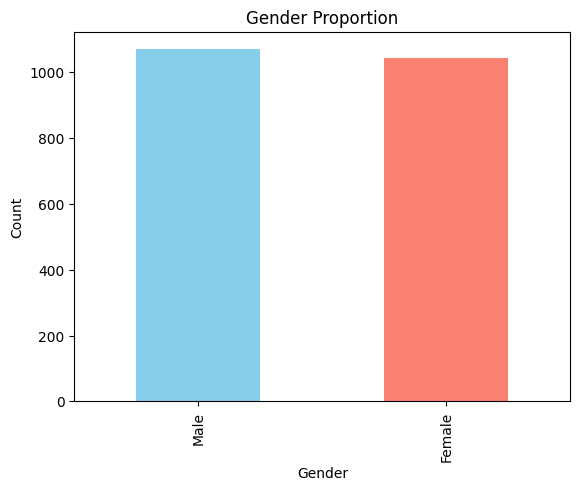

In [17]:
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Proportion')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

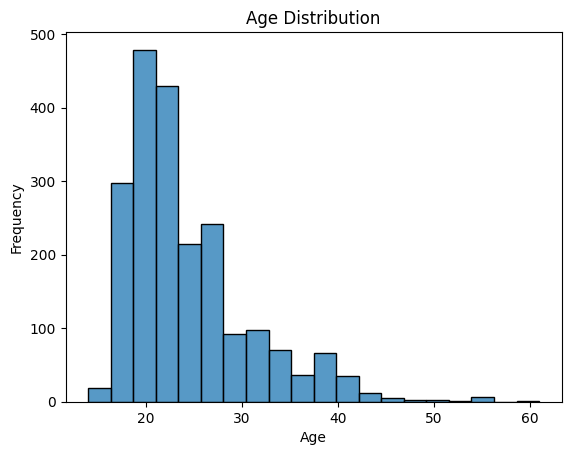

In [26]:
sns.histplot(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

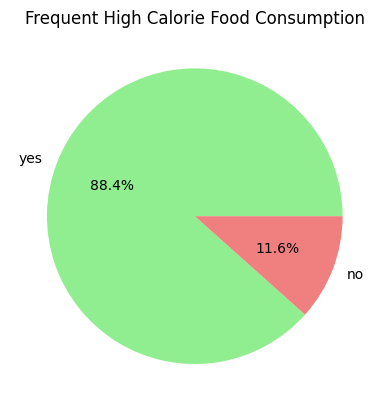

In [25]:
df['FrequentHighCalorieFood'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Frequent High Calorie Food Consumption')
plt.ylabel('')
plt.show()

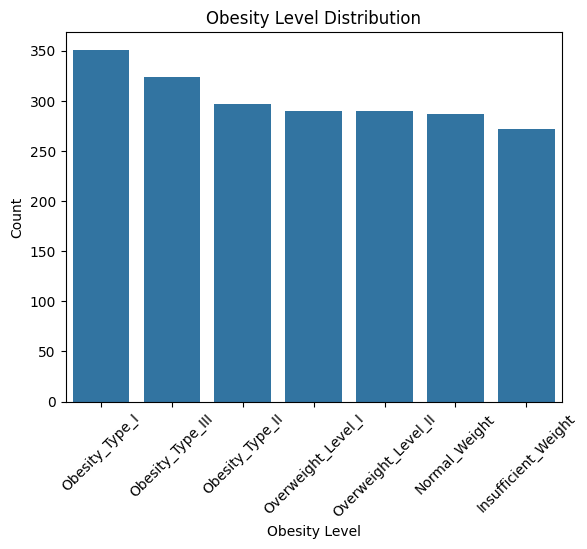

In [20]:
sns.countplot(data=df, x='ObesityLevelDeducted', order=df['ObesityLevelDeducted'].value_counts().index)
plt.title('Obesity Level Distribution')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

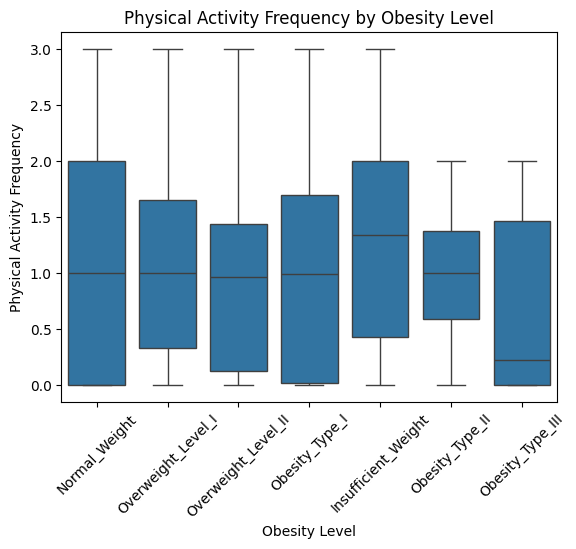

In [22]:
sns.boxplot(data=df, x='ObesityLevelDeducted', y='PhysicalActivityFrequency')
plt.title('Physical Activity Frequency by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Physical Activity Frequency')
plt.xticks(rotation=45)
plt.show()

The boxplot above shows how often people engage in physical activity based on their weight categories:

Normal weight individuals are the most active, with a higher median frequency of physical activity compared to other groups.
As weight increases (from Overweight to Obesity Levels I, II, and III), activity levels drop, with less frequent physical activity in higher obesity levels.
Underweight individuals also show lower activity levels, which might be due to health or energy limitations.
Overall, higher activity levels seem linked to maintaining a healthy weight, while reduced activity is more common in both obese and underweight groups. This highlights the importance of promoting physical activity tailored to each group.

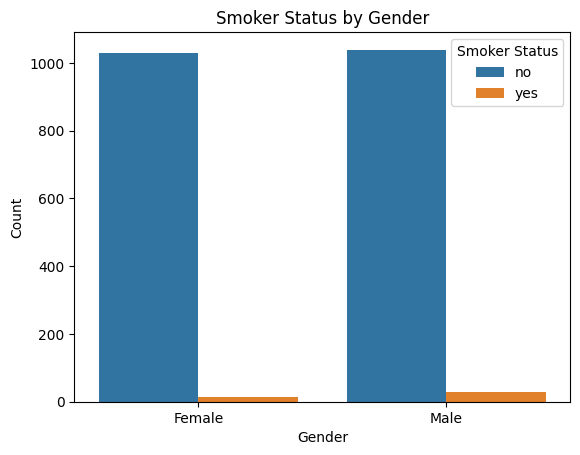

In [23]:
sns.countplot(data=df, x='Gender', hue='SmokerStatus')
plt.title('Smoker Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker Status')
plt.show()


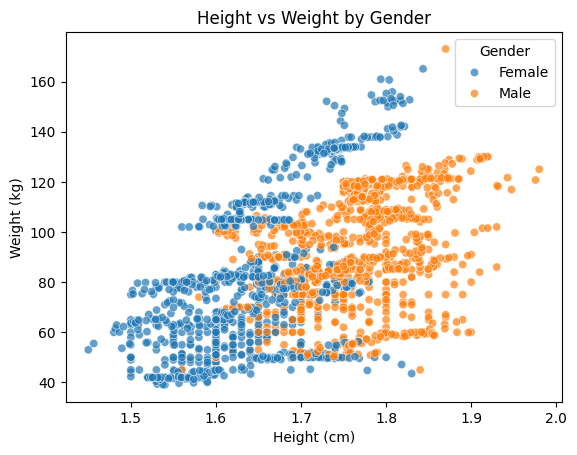

In [31]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender', alpha=0.7)
plt.title('Height vs Weight by Gender')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


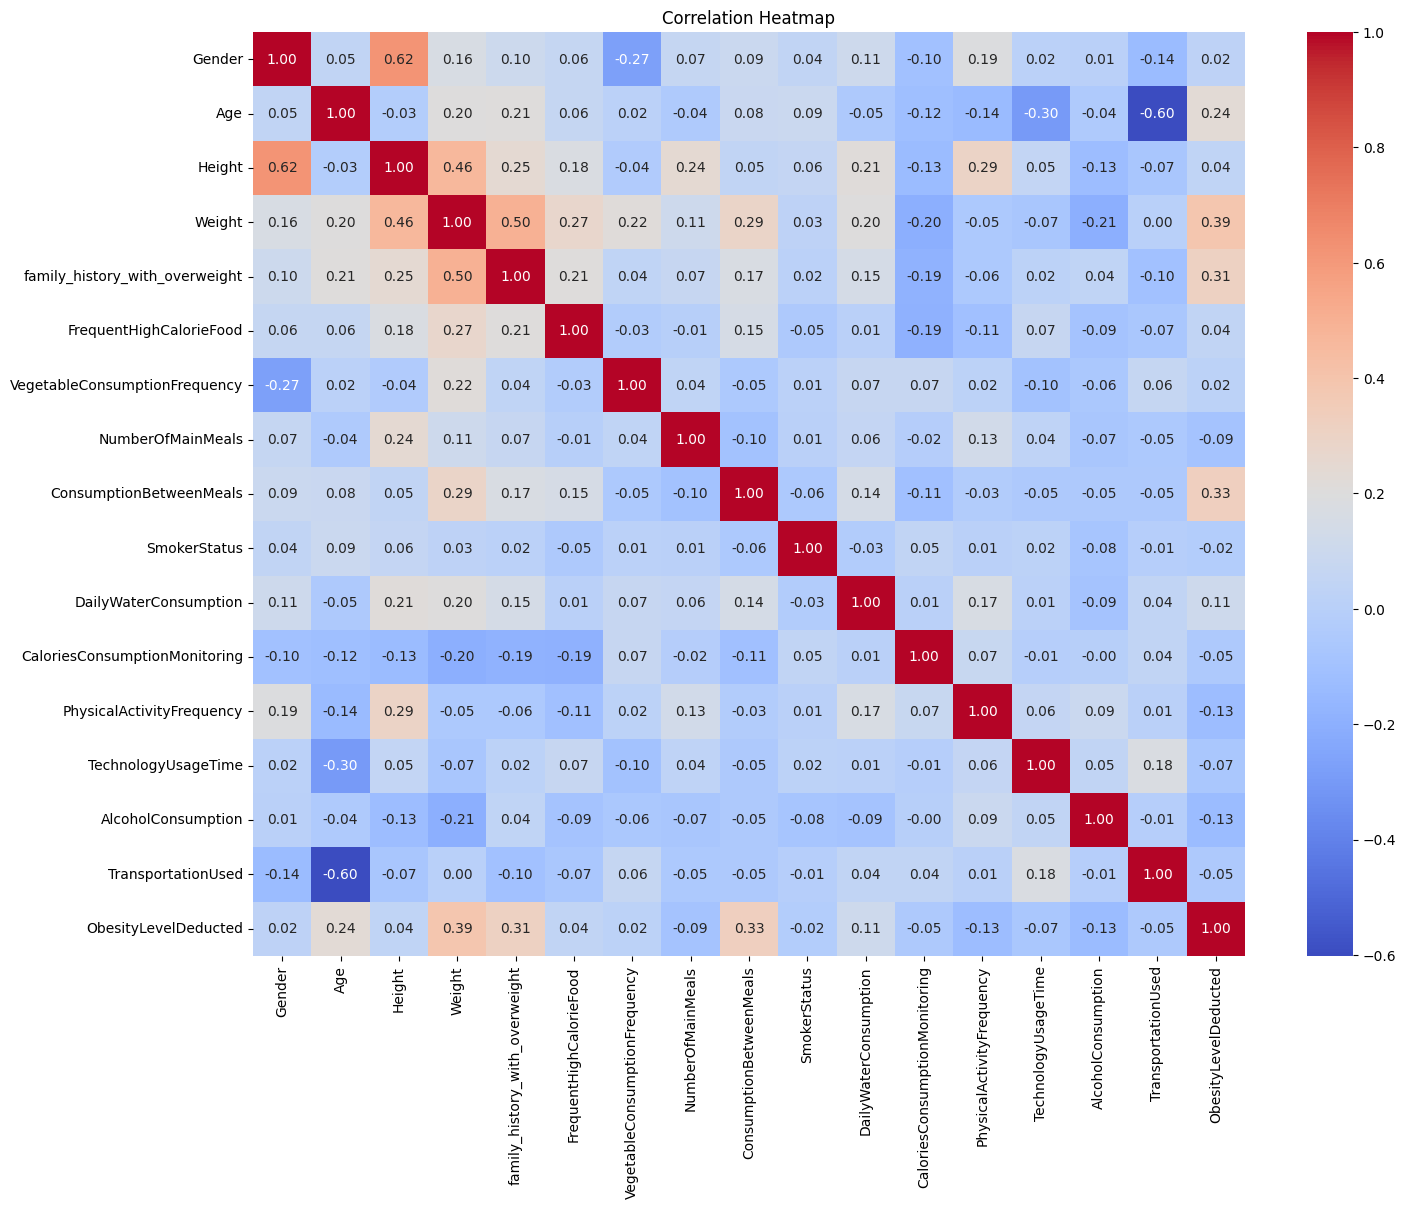

In [43]:
# Define a function to encode categorical labels
def encode_labels(dataframe, column):
    label_encoder = LabelEncoder()
    dataframe[column] = label_encoder.fit_transform(dataframe[column])
    return dataframe

# Encode categorical columns
categorical_columns = ['Gender', 'family_history_with_overweight', 
                       'FrequentHighCalorieFood', 'ConsumptionBetweenMeals', 
                       'SmokerStatus', 'CaloriesConsumptionMonitoring', 
                       'AlcoholConsumption', 'TransportationUsed', 
                       'ObesityLevelDeducted']

for col in categorical_columns:
    df = encode_labels(df, col)

# Generate a correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
